In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# maybe necessary to run if ultralytics not detected
!pip install ultralytics

In [48]:
from ultralytics import YOLO
import os

In [49]:
def run_inference(weights_path, source, img_size=640, device='0'):
	"""
	Function to run inference using the trained YOLOv11 model.

	Parameters:
	- weights_path: Path to the trained weights
	- source: Directory or image path to run inference on
	- img_size: Image size for inference (default: 640)
	- conf_thresh: Confidence threshold (default: 0.25)
	- device: Device to run on ('0' for GPU, 'cpu' for CPU)
	"""

	print(f"Running inference on images in {source}")
	model = YOLO(weights_path).to(device)
	image_filenames = [filename for filename in os.listdir(source) if filename.endswith(('.jpg', '.jpeg', '.png'))]
	image_paths = [os.path.join(source, filename) for filename in image_filenames]
	results = [model(img_path, imgsz=img_size) for img_path in image_paths]
	print("Inference Complete.")
	return results

In [50]:
weights_path = "/content/drive/MyDrive/AI 3rd Year/Vision Learning I/yolo11n_finetuned.pt"
source = "/content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal"
img_size = 640
device = "cpu"

In [51]:
groundtruth = []
image_filenames = [filename for filename in os.listdir(source) if filename.endswith(('.jpg', '.jpeg', '.png'))]
for filename in image_filenames:
  groundtruth.append(filename.split(".")[0])

print(groundtruth)


['8778LVY', '7332JKC', '1755JKV', '1426JVT', '3497BYY', '3046KMK', '1599DLB', '3691MTY', '2885BKJ', '1949LLT', '7469JYS', '1111LRB']


In [52]:
results = run_inference(weights_path,source,img_size, device = device)

Running inference on images in /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/8778LVY.jpg: 640x640 1 license_plate, 304.1ms
Speed: 3.4ms preprocess, 304.1ms inference, 12.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/7332JKC.jpg: 640x640 1 license_plate, 345.3ms
Speed: 3.3ms preprocess, 345.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/1755JKV.jpg: 640x640 1 license_plate, 433.3ms
Speed: 5.2ms preprocess, 433.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/AI 3rd Year/Vision Learning I/ReducedVal/1426JVT.jpg: 640x640 1 license_plate, 553.6ms
Speed: 3.5ms preprocess, 553.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/My

In [53]:
results

[[ultralytics.engine.results.Results object with attributes:
  
  boxes: ultralytics.engine.results.Boxes object
  keypoints: None
  masks: None
  names: {0: 'license_plate'}
  obb: None
  orig_img: array([[[ 88, 137, 117],
          [129, 178, 158],
          [138, 186, 168],
          ...,
          [109, 153, 140],
          [163, 209, 196],
          [112, 158, 145]],
  
         [[ 91, 140, 120],
          [110, 159, 139],
          [131, 179, 161],
          ...,
          [123, 167, 154],
          [185, 229, 216],
          [141, 187, 174]],
  
         [[110, 156, 137],
          [111, 157, 138],
          [126, 175, 155],
          ...,
          [159, 203, 190],
          [173, 217, 204],
          [151, 195, 182]],
  
         ...,
  
         [[192, 204, 208],
          [192, 204, 208],
          [191, 203, 207],
          ...,
          [ 95,  76,  49],
          [ 96,  77,  50],
          [ 97,  78,  51]],
  
         [[190, 202, 206],
          [190, 202, 206],
        

In [54]:
results[0][0].boxes.xyxy[0].cpu().numpy().astype(int).tolist()

[293, 318, 383, 362]

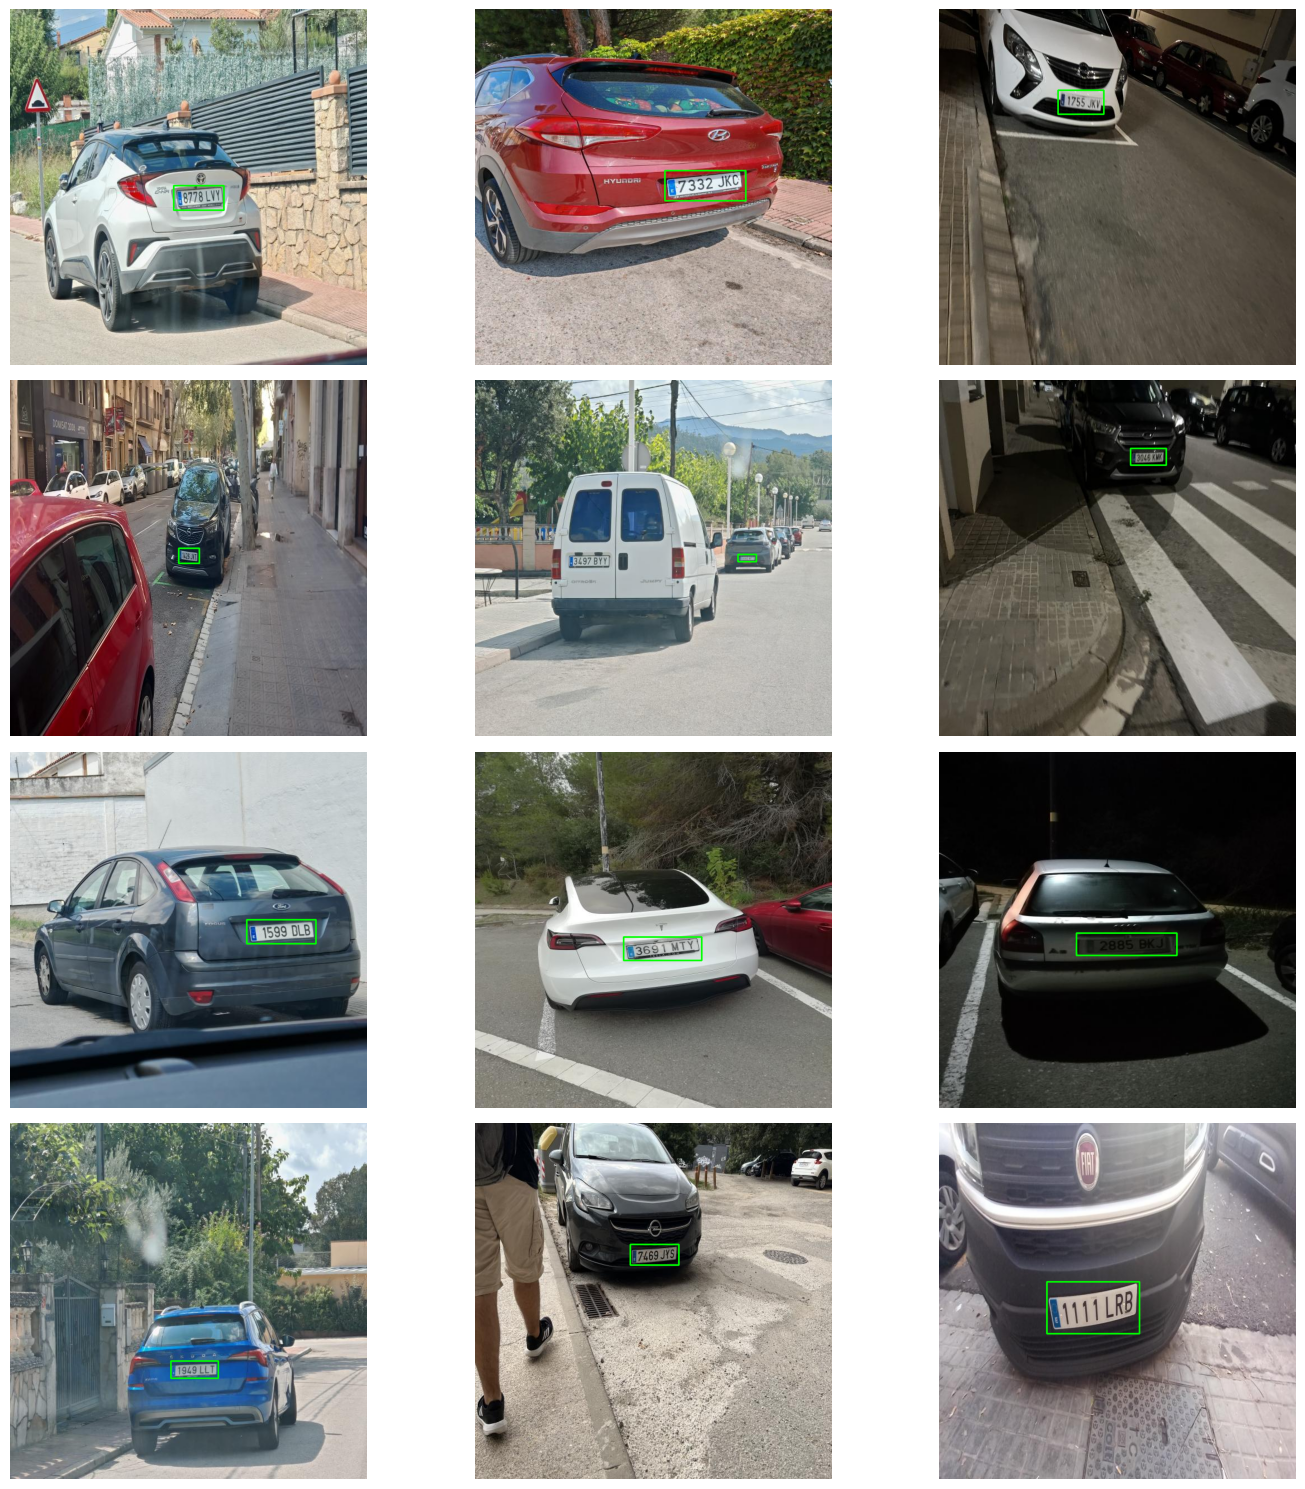

In [55]:
from re import A
import cv2
import matplotlib.pyplot as plt
import math

cropped_words = []

# Determine the number of rows and columns for the subplot grid
num_images = len(results)
cols = 3  # Number of columns (adjust as needed)
rows = math.ceil(num_images / cols)  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over the images and display them in subplots
for idx, result in enumerate(results):
	result = result[0]
	img = result.orig_img
	box = result.boxes.xyxy[0].cpu().numpy().astype(int).tolist()

	if img is not None:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

		# Draw the bounding box on the image
		x1, y1, x2, y2 = box
		cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
		cropped_word = img[y1:y2, x1:x2]
		cropped_words.append(cropped_word)

		# Display the image in the subplot
		axes[idx].imshow(img)
		axes[idx].axis('off')  # Hide the axis
	else:
		print("Could not load image")

# Remove any unused subplots
for i in range(num_images, len(axes)):
	fig.delaxes(axes[i])

# Display the grid of images
plt.tight_layout()
plt.show()

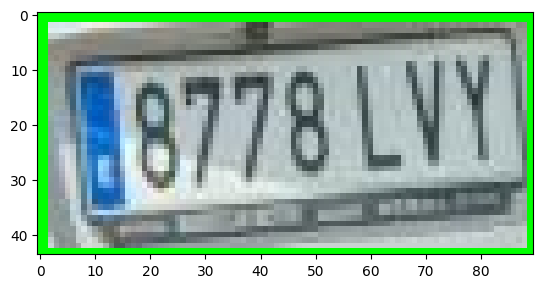

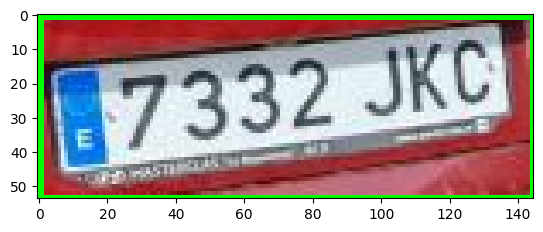

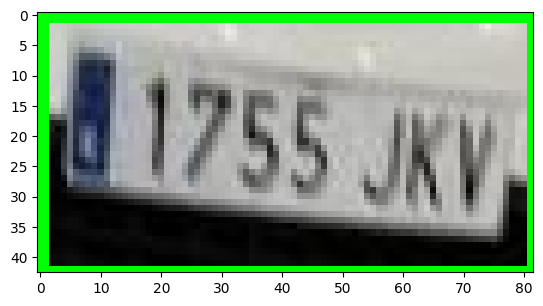

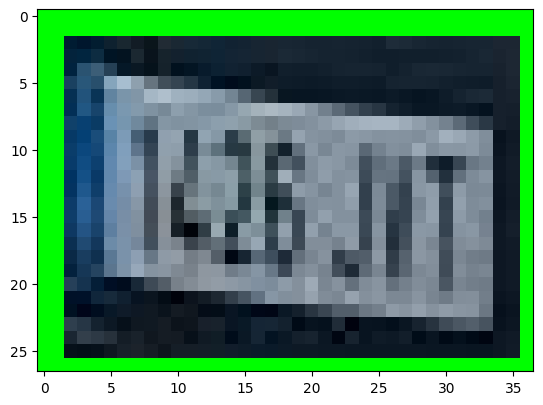

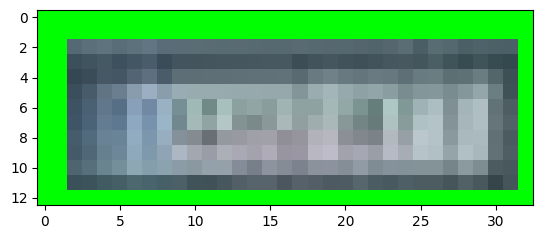

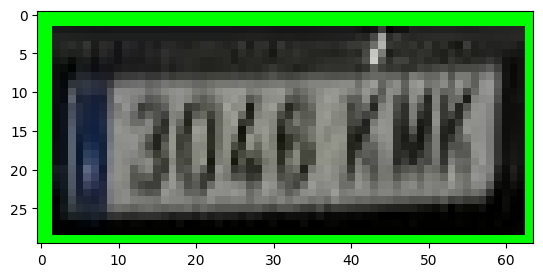

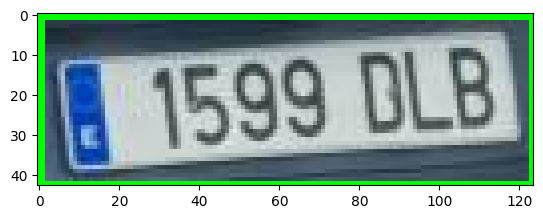

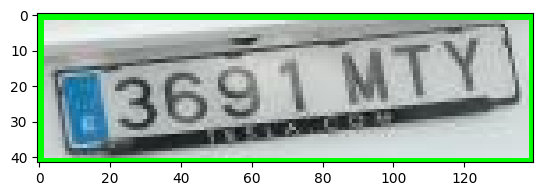

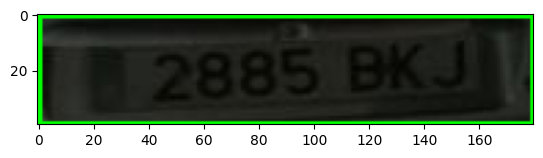

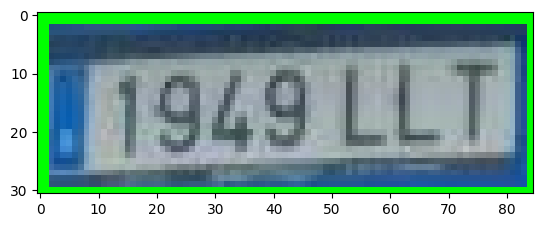

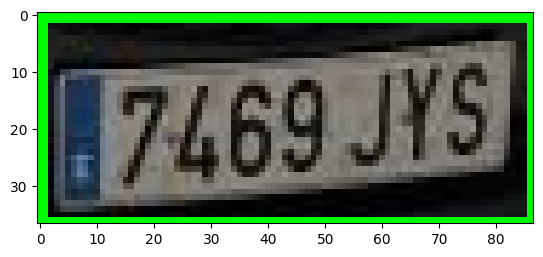

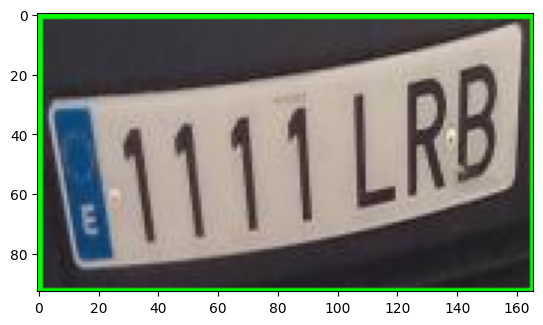

In [56]:
for img in cropped_words:
    plt.imshow(img)
    plt.show()

In [57]:
!pip install easyocr
!pip install torch torchvision

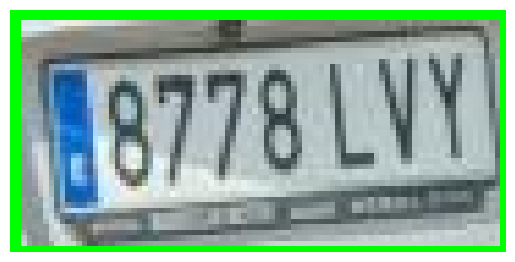

Texto detectado en la imagen:
8778 LVY


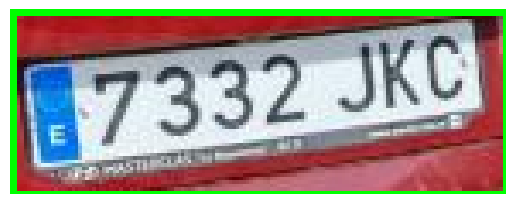

Texto detectado en la imagen:
7332 JKO


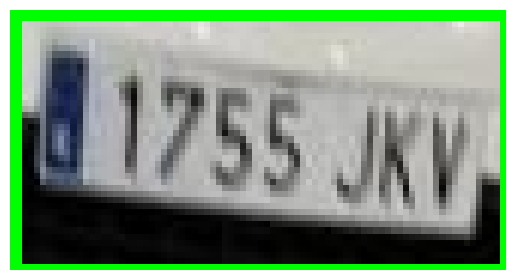

Texto detectado en la imagen:
1255 JKV


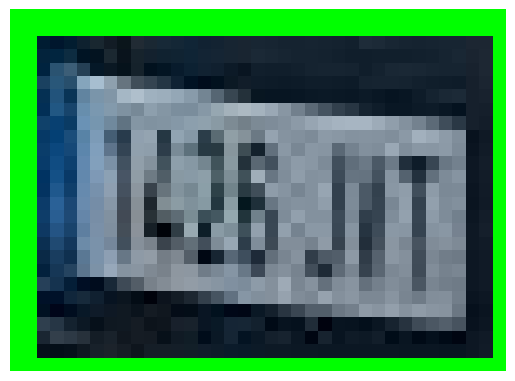

Texto detectado en la imagen:
126 Ji


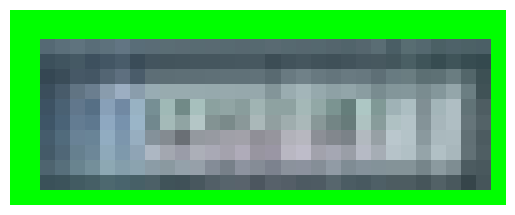

Texto detectado en la imagen:


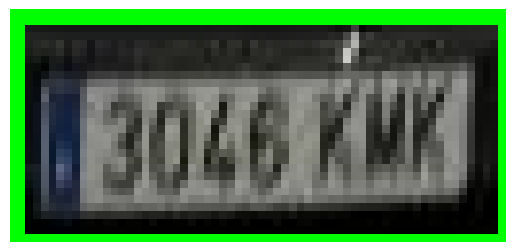

Texto detectado en la imagen:
Euliiy


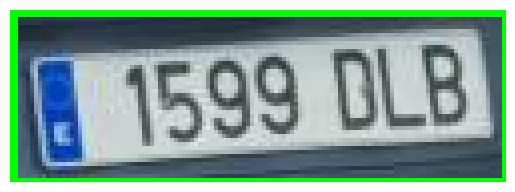

Texto detectado en la imagen:
1599 DLB


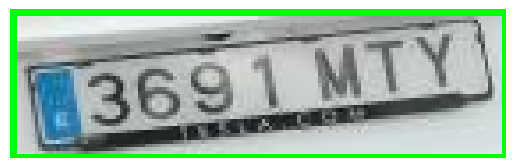

Texto detectado en la imagen:
MIY
3691


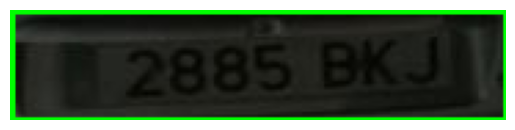

Texto detectado en la imagen:
2883@


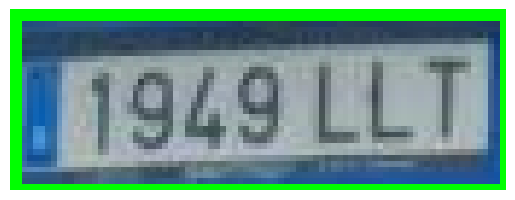

Texto detectado en la imagen:
[9LILLI


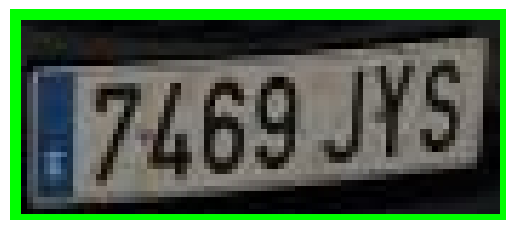

Texto detectado en la imagen:
7469 JYs]


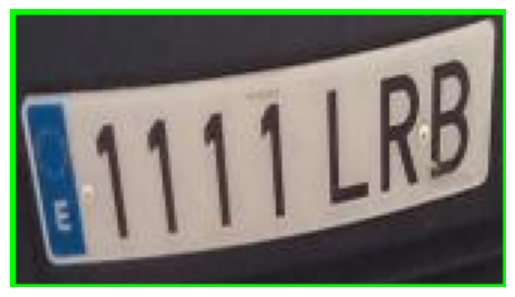

Texto detectado en la imagen:
LRb
1111


In [58]:
import easyocr
import matplotlib.pyplot as plt
import cv2

reader = easyocr.Reader(['es'])
result_direct = []

for img in cropped_words:

    result = reader.readtext(img, detail = 0 )  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_direct.append(result)
    # Mostrar la imagen con el texto detectado
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Mostrar el resultado de texto detectado
    print("Texto detectado en la imagen:")
    for res in result:
        print(res)


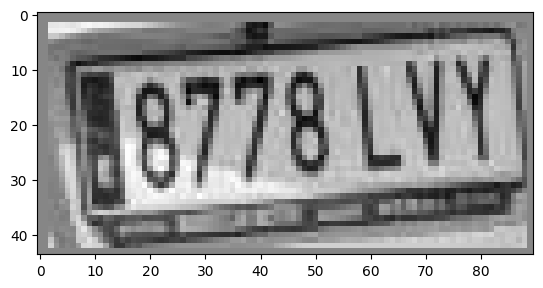

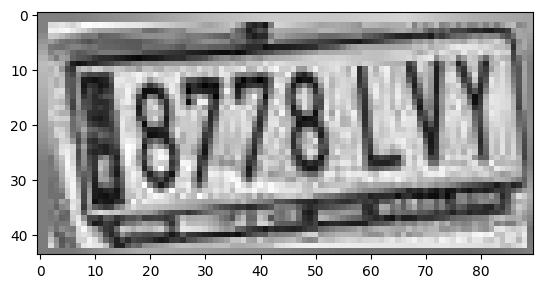

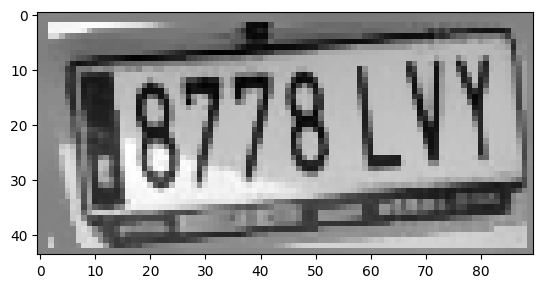

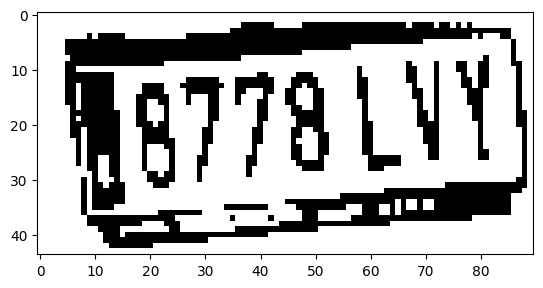

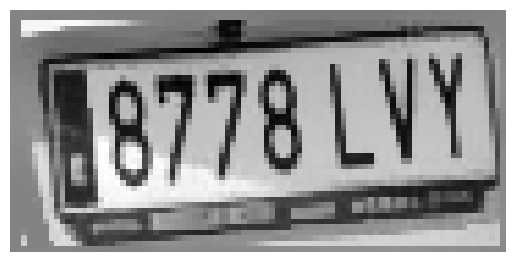

Texto detectado en la imagen:
[8778 LVY


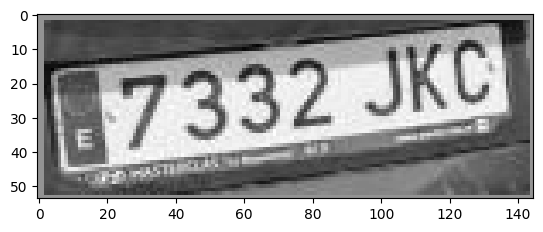

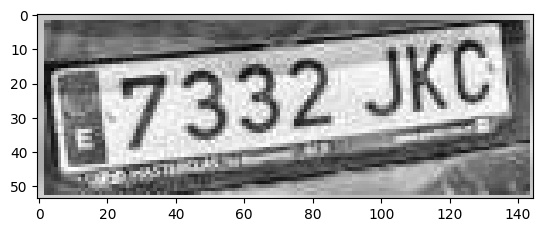

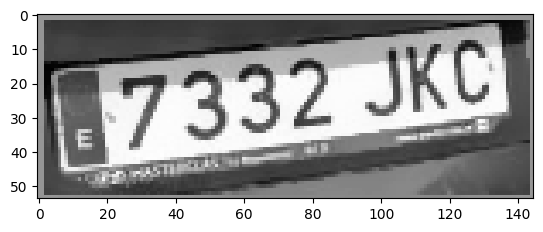

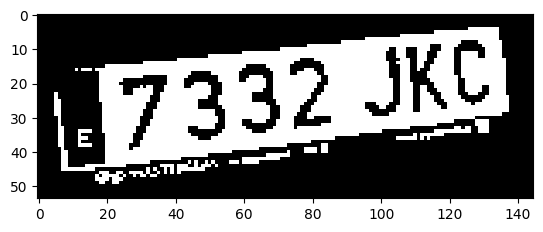

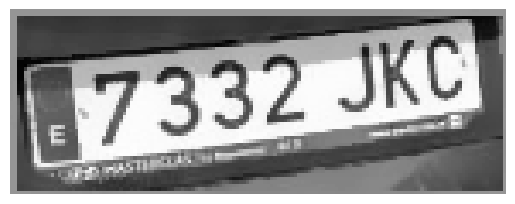

Texto detectado en la imagen:
7332 JKC


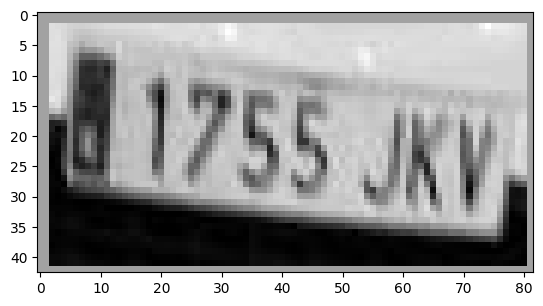

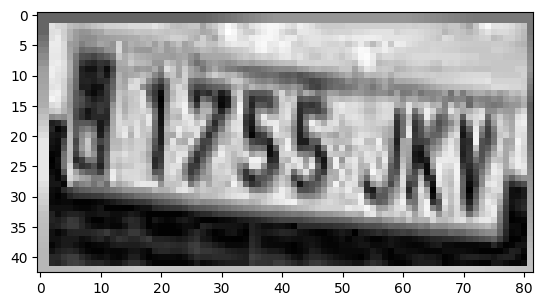

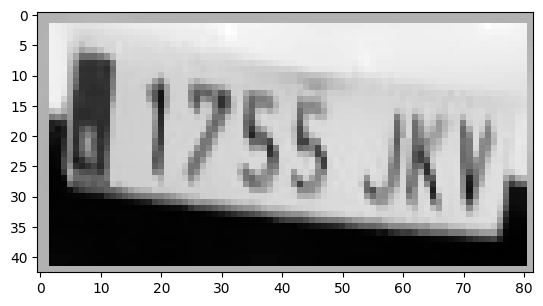

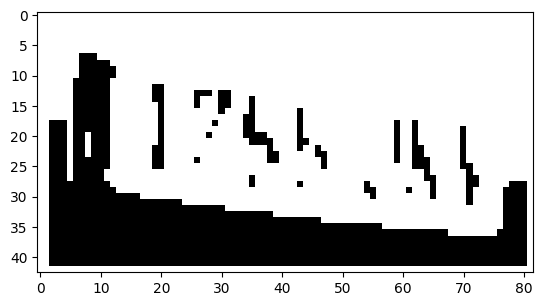

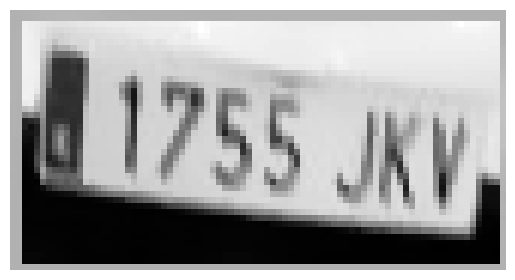

Texto detectado en la imagen:
1755 JKV


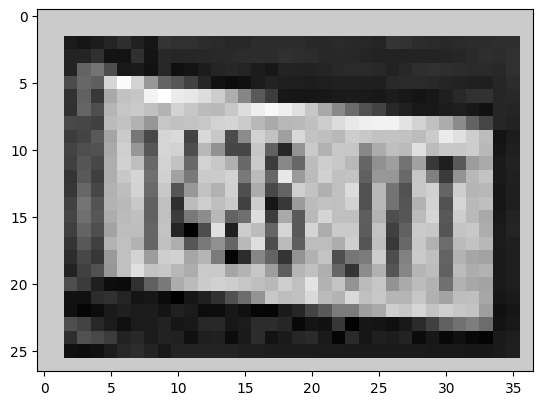

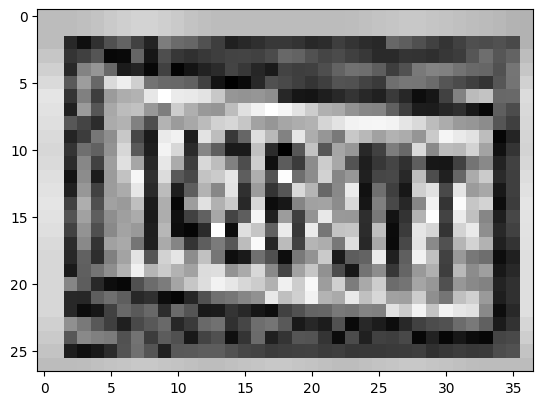

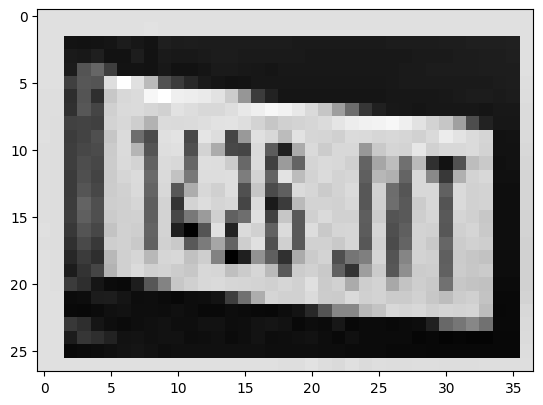

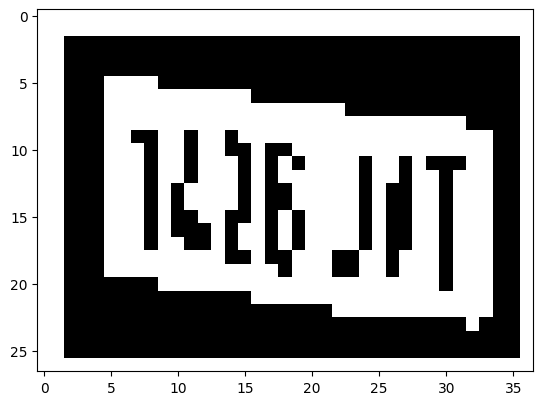

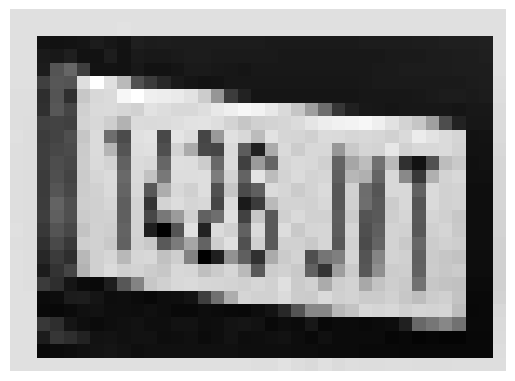

Texto detectado en la imagen:


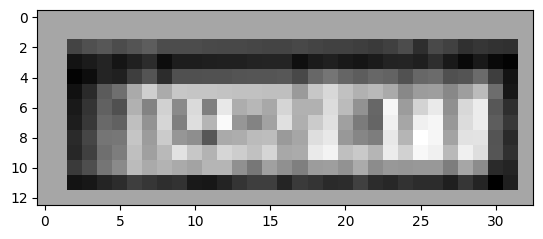

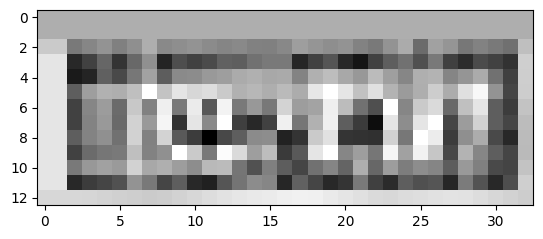

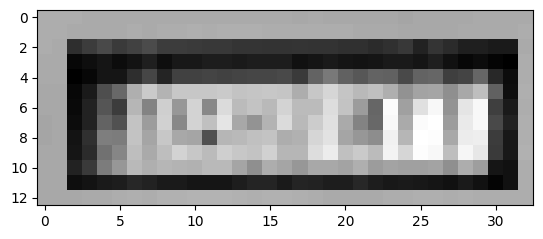

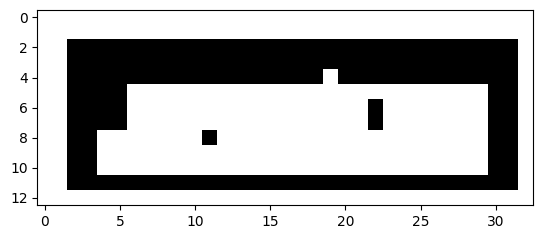

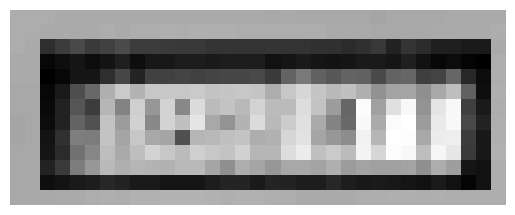

Texto detectado en la imagen:


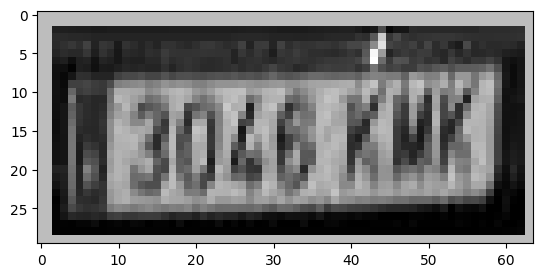

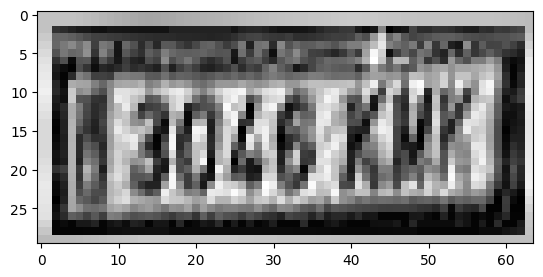

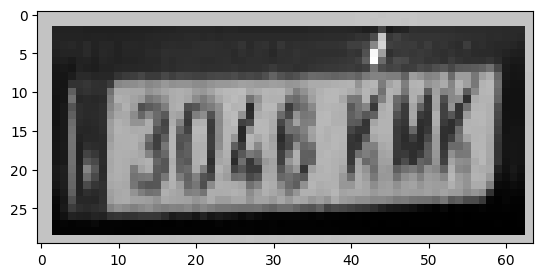

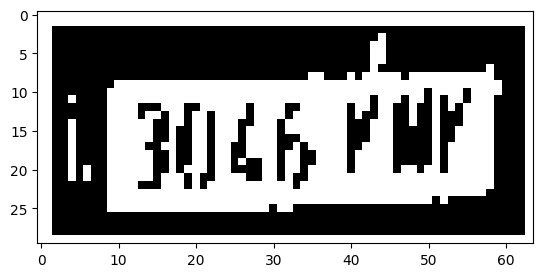

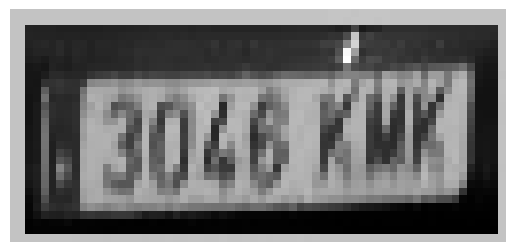

Texto detectado en la imagen:
E06


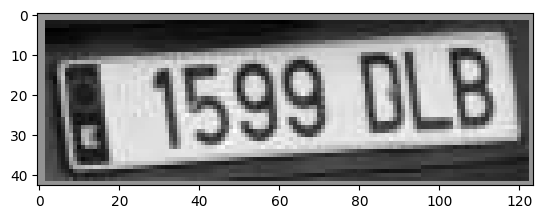

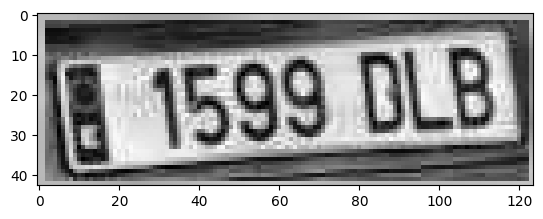

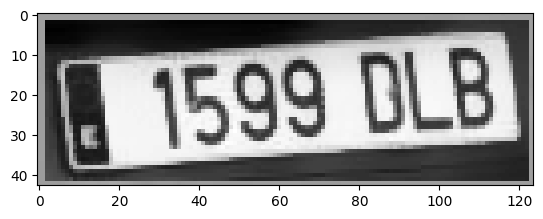

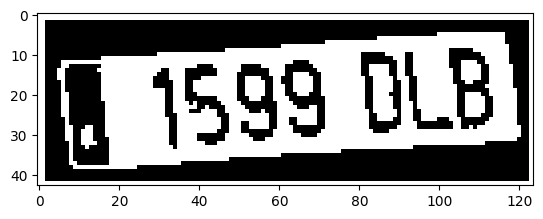

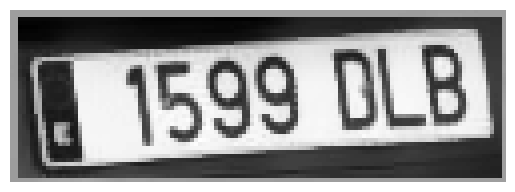

Texto detectado en la imagen:
1599 DLB


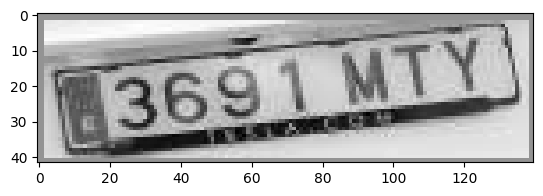

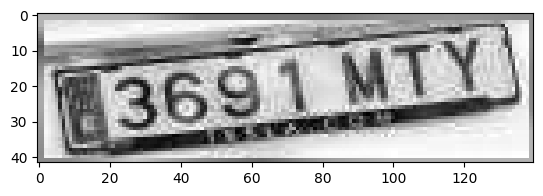

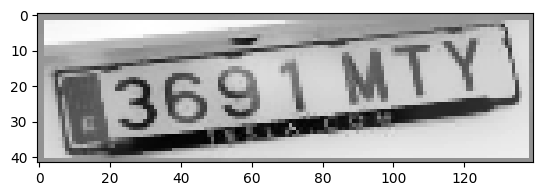

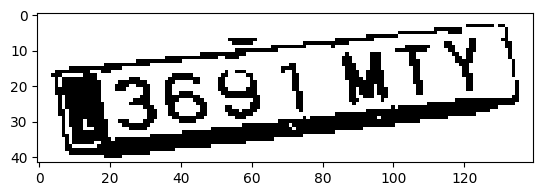

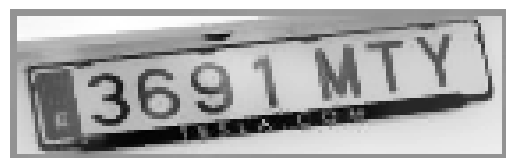

Texto detectado en la imagen:
369
IMY


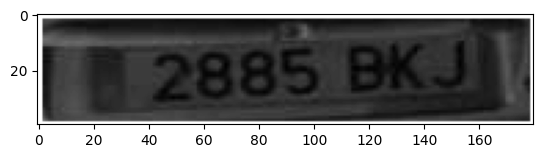

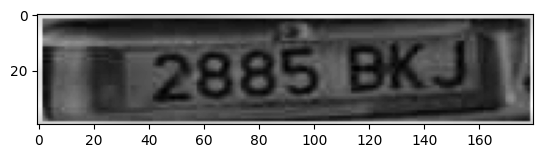

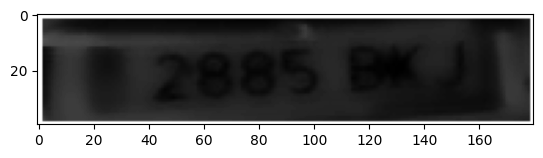

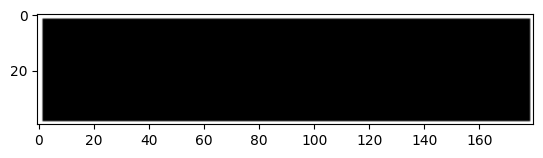

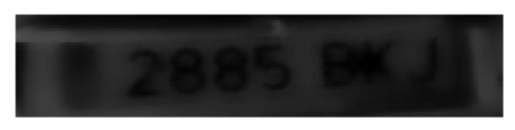

Texto detectado en la imagen:
1


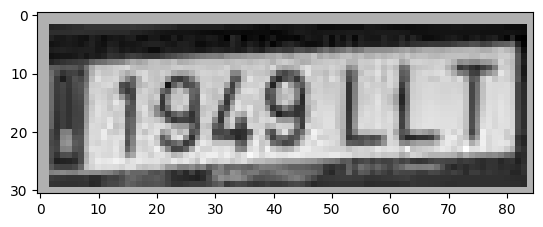

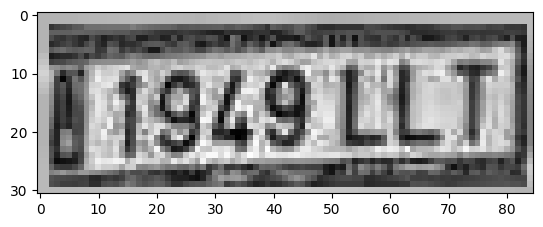

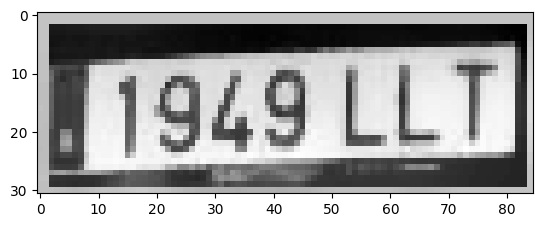

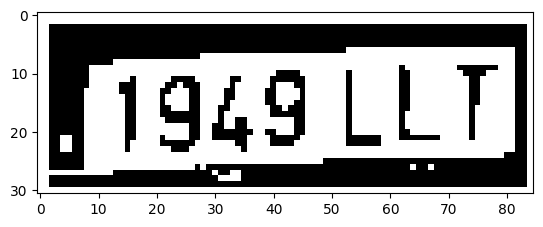

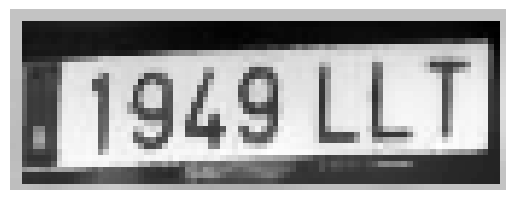

Texto detectado en la imagen:
1949 LLT


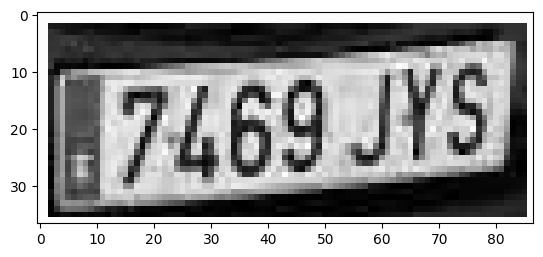

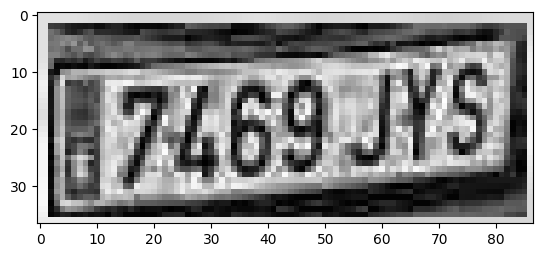

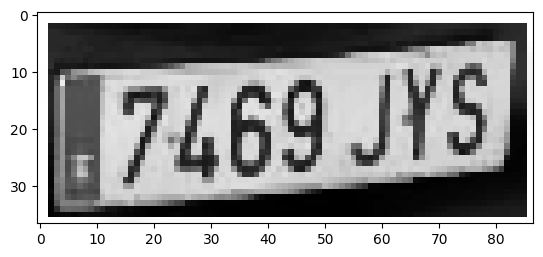

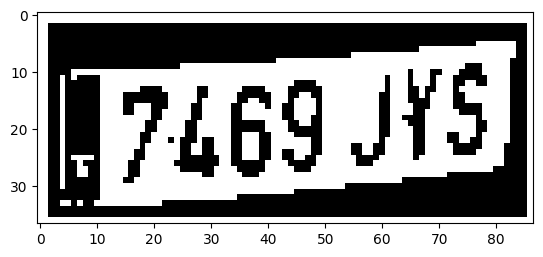

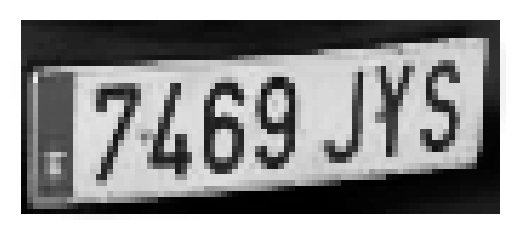

Texto detectado en la imagen:
7469 JYs]


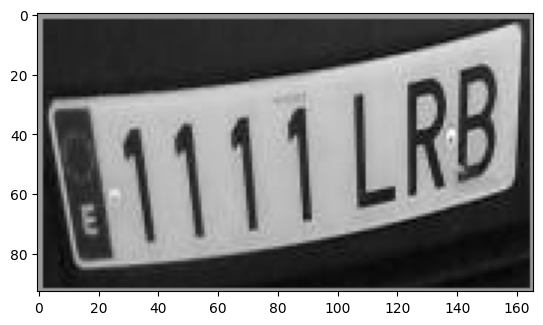

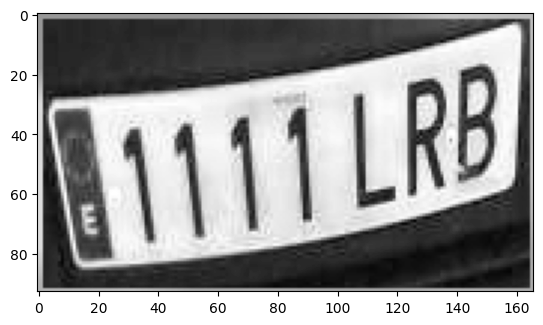

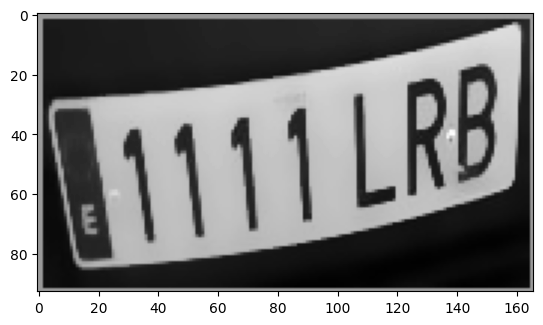

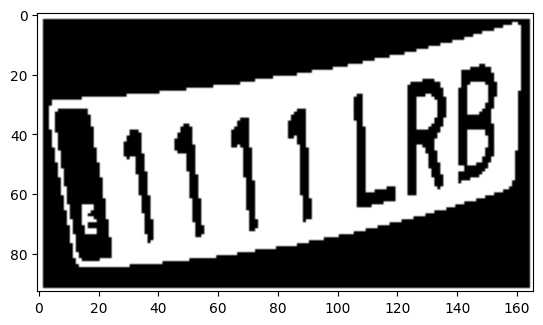

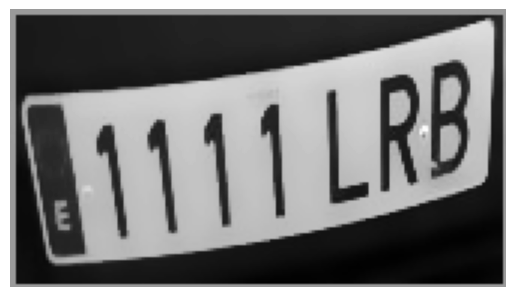

Texto detectado en la imagen:
1111LRB]


In [59]:
result_prepro = []
for img in cropped_words:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(img,'gray')
    plt.show()

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast = clahe.apply(img)
    plt.imshow(contrast,'gray')
    plt.show()

    # Aplicar desenfoque (filtro bilateral o GaussianBlur)
    img = cv2.bilateralFilter(img, 11, 17, 17)
    plt.imshow(img,'gray')
    plt.show()



    # Aplicar umbralización (adaptativa o de Otsu)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(binary,'gray')
    plt.show()

    result = reader.readtext(img, detail = 0)  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_prepro.append(result)

    # Mostrar la imagen con el texto detectado
    plt.imshow(img,'gray')
    plt.axis('off')
    plt.show()

    print("Texto detectado en la imagen:")
    for res in result:
        print(res)

In [60]:
list(zip(groundtruth,result_direct,result_prepro))

[('8778LVY', ['8778 LVY'], ['[8778 LVY']),
 ('7332JKC', ['7332 JKO'], ['7332 JKC']),
 ('1755JKV', ['1255 JKV'], ['1755 JKV']),
 ('1426JVT', ['126 Ji'], []),
 ('3497BYY', [], []),
 ('3046KMK', ['Euliiy'], ['E06']),
 ('1599DLB', ['1599 DLB'], ['1599 DLB']),
 ('3691MTY', ['MIY', '3691'], ['369', 'IMY']),
 ('2885BKJ', ['2883@'], ['1']),
 ('1949LLT', ['[9LILLI'], ['1949 LLT']),
 ('7469JYS', ['7469 JYs]'], ['7469 JYs]']),
 ('1111LRB', ['LRb', '1111'], ['1111LRB]'])]

In [61]:
pip install python-Levenshtein


In [62]:
import Levenshtein

def compute_levenshtein_similarity(groundtruth, result_direct, result_prepro):
    total_direct_similarity = 0
    total_prepro_similarity = 0
    num_samples = len(groundtruth)

    comparison = []

    for gt, direct, prepro in zip(groundtruth, result_direct, result_prepro):
        # Unir los resultados (por si hay listas) y convertir en string vacíos si no hay resultado
        direct_str = ''.join(direct) if direct else ''
        prepro_str = ''.join(prepro) if prepro else ''

        # Calcular distancia de Levenshtein para ambas aproximaciones
        direct_levenshtein = Levenshtein.distance(gt, direct_str)
        prepro_levenshtein = Levenshtein.distance(gt, prepro_str)

        # Normalizar la distancia (1 - (distance / max_length)) para obtener la proporción de acierto
        max_len = max(len(gt), len(direct_str), len(prepro_str))
        direct_similarity = 1 - (direct_levenshtein / max_len) if max_len > 0 else 0
        prepro_similarity = 1 - (prepro_levenshtein / max_len) if max_len > 0 else 0

        # Acumular para el promedio
        total_direct_similarity += direct_similarity
        total_prepro_similarity += prepro_similarity

        # Guardar resultados en la lista de comparación
        comparison.append({
            'Ground Truth': gt,
            'Direct Result': direct_str,
            'Direct Similarity': direct_similarity,
            'Preprocessed Result': prepro_str,
            'Preprocessed Similarity': prepro_similarity
        })

    # Calcular el promedio de aciertos para ambos métodos
    avg_direct_similarity = total_direct_similarity / num_samples
    avg_prepro_similarity = total_prepro_similarity / num_samples

    return comparison, avg_direct_similarity, avg_prepro_similarity

# Uso del código con tus datos:
comparison_results, avg_direct_similarity, avg_prepro_similarity = compute_levenshtein_similarity(groundtruth, result_direct, result_prepro)


# Imprimir las similitudes promedio de cada método
print("Result Reader Configuration 'ES': \n")
print(f"Average Direct Similarity: {avg_direct_similarity:.2f}")
print(f"Average Preprocessed Similarity: {avg_prepro_similarity:.2f}\n")


for result in comparison_results:
    print(f"Ground Truth: {result['Ground Truth']}")
    print(f"Direct Result: {result['Direct Result']} (Similarity: {result['Direct Similarity']:.2f})")
    print(f"Preprocessed Result: {result['Preprocessed Result']} (Similarity: {result['Preprocessed Similarity']:.2f})")
    print("-" * 50)



Result Reader Configuration 'ES': 

Average Direct Similarity: 0.47
Average Preprocessed Similarity: 0.57

Ground Truth: 8778LVY
Direct Result: 8778 LVY (Similarity: 0.89)
Preprocessed Result: [8778 LVY (Similarity: 0.78)
--------------------------------------------------
Ground Truth: 7332JKC
Direct Result: 7332 JKO (Similarity: 0.75)
Preprocessed Result: 7332 JKC (Similarity: 0.88)
--------------------------------------------------
Ground Truth: 1755JKV
Direct Result: 1255 JKV (Similarity: 0.75)
Preprocessed Result: 1755 JKV (Similarity: 0.88)
--------------------------------------------------
Ground Truth: 1426JVT
Direct Result: 126 Ji (Similarity: 0.43)
Preprocessed Result:  (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 3497BYY
Direct Result:  (Similarity: 0.00)
Preprocessed Result:  (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 3046KMK
Direct Result: Euliiy (Similarity: 0.00)
Preprocessed Result: E06 (Simi

In [63]:
reader = easyocr.Reader(['en'])
result_direct = []

for img in cropped_words:
    result = reader.readtext(img, detail = 0 )  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_direct.append(result)

result_prepro = []
for img in cropped_words:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast = clahe.apply(img)
    img = cv2.bilateralFilter(img, 11, 17, 17)
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    result = reader.readtext(img, detail = 0)  # `detail=0` solo devuelve el texto detectado sin detalles adicionales
    result_prepro.append(result)

comparison_results, avg_direct_similarity, avg_prepro_similarity = compute_levenshtein_similarity(groundtruth, result_direct, result_prepro)


# Imprimir las similitudes promedio de cada método
print("Result Reader Configuration 'EN': \n")
print(f"Average Direct Similarity: {avg_direct_similarity:.2f}")
print(f"Average Preprocessed Similarity: {avg_prepro_similarity:.2f}\n")


for result in comparison_results:
    print(f"Ground Truth: {result['Ground Truth']}")
    print(f"Direct Result: {result['Direct Result']} (Similarity: {result['Direct Similarity']:.2f})")
    print(f"Preprocessed Result: {result['Preprocessed Result']} (Similarity: {result['Preprocessed Similarity']:.2f})")
    print("-" * 50)



Result Reader Configuration 'EN': 

Average Direct Similarity: 0.46
Average Preprocessed Similarity: 0.48

Ground Truth: 8778LVY
Direct Result: 8778 LVY (Similarity: 0.90)
Preprocessed Result: [18778 LVY (Similarity: 0.70)
--------------------------------------------------
Ground Truth: 7332JKC
Direct Result: 77332 JkO (Similarity: 0.56)
Preprocessed Result: 7332 JKO] (Similarity: 0.67)
--------------------------------------------------
Ground Truth: 1755JKV
Direct Result: 1255 JN (Similarity: 0.50)
Preprocessed Result: 1255 JKV (Similarity: 0.75)
--------------------------------------------------
Ground Truth: 1426JVT
Direct Result: 1l26J (Similarity: 0.57)
Preprocessed Result:  (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 3497BYY
Direct Result:  (Similarity: 0.00)
Preprocessed Result:  (Similarity: 0.00)
--------------------------------------------------
Ground Truth: 3046KMK
Direct Result: (eotau (Similarity: 0.00)
Preprocessed Result: DuG (Sim